In [1]:
import keras
from keras.layers import Dense,LSTM,Embedding,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

Using TensorFlow backend.


In [13]:
with open("lyrics.txt",'r') as file:
    data =[]
    lines = file.readlines()
    tokenizer  = Tokenizer()
    for i in range(len(lines)):
        line = lines[i]
        line = line.lower()
        data.append(line)
        
    tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index

None
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 

In [3]:
input_sequences = []
labels = []
for line in data:
    sequence = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(sequence)):
        token_list = sequence[:i]
        label = sequence[i]
        labels.append(label)
        input_sequences.append(token_list)
    

In [4]:
input_sequences = pad_sequences(input_sequences)

In [5]:
max_length = len(input_sequences[0])
print(max_length)
total_words = len(word_index)+1  #because word_index starts from 1
print(total_words)

15
2690


In [6]:
model  = keras.Sequential([Embedding(total_words,100,input_length = max_length),
                          Bidirectional(LSTM(64)),
                           Dense(total_words,activation = "softmax")
                          ])

In [7]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])
history = model.fit(input_sequences,labels,epochs=125)

C:\Users\Dev\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/125
12038/12038 [==============================] - 9s 761us/step - loss: 6.7736 - acc: 0.0647
Epoch 2/125
12038/12038 [==============================] - 10s 804us/step - loss: 6.2690 - acc: 0.0731
Epoch 3/125
12038/12038 [==============================] - 9s 720us/step - loss: 6.0738 - acc: 0.0817
Epoch 4/125
12038/12038 [==============================] - 9s 727us/step - loss: 5.8777 - acc: 0.0893
Epoch 5/125
12038/12038 [==============================] - 9s 732us/step - loss: 5.6688 - acc: 0.1031
Epoch 6/125
12038/12038 [==============================] - 9s 754us/step - loss: 5.4712 - acc: 0.1143
Epoch 7/125
12038/12038 [==============================] - 8s 676us/step - loss: 5.2757 - acc: 0.1234
Epoch 8/125
12038/12038 [==============================] - 8s 650us/step - loss: 5.0887 - acc: 0.1327
Epoch 9/125
12038/12038 [==============================] - 8s 649us/step - loss: 4.9055 - acc: 0.1439
Epoch 10/125
12038/12038 [==============================] - 8s 647us/step - loss:

12038/12038 [==============================] - 10s 855us/step - loss: 0.5899 - acc: 0.8485
Epoch 80/125
12038/12038 [==============================] - 10s 844us/step - loss: 0.5933 - acc: 0.8471
Epoch 81/125
12038/12038 [==============================] - 10s 846us/step - loss: 0.5807 - acc: 0.8506
Epoch 82/125
12038/12038 [==============================] - 10s 815us/step - loss: 0.5777 - acc: 0.8501
Epoch 83/125
12038/12038 [==============================] - 8s 698us/step - loss: 0.5764 - acc: 0.8485
Epoch 84/125
12038/12038 [==============================] - 8s 701us/step - loss: 0.5815 - acc: 0.8462
Epoch 85/125
12038/12038 [==============================] - 8s 700us/step - loss: 0.5711 - acc: 0.8482
Epoch 86/125
12038/12038 [==============================] - 8s 702us/step - loss: 0.5611 - acc: 0.8501
Epoch 87/125
12038/12038 [==============================] - 9s 767us/step - loss: 0.5553 - acc: 0.8511
Epoch 88/125
12038/12038 [==============================] - 10s 869us/step - loss:

In [15]:
index_word = tokenizer.index_word
sentence = "Help me Obi Wan Kenobi you are my only hope"
for i in range(100):
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    sequence = pad_sequences([sequence],maxlen=max_length)
    predictions = model.predict([sequence])
    prediction = np.argmax(predictions)
    word  = index_word.get(prediction)
    sentence+=" "+word
    
print(sentence)

    




Help me Obi Wan Kenobi you are my only hope and love as she said she turned homeward and paddy road face the still of the land place the bed are bed fields whispers more of valley had had years is love in your hand i shook a wild kind bed make your fray remind neer ever been and stand beside a fine raking banks clear are green with that still sang grow voice breast voice bulging answered killarney the creole ground world past ra rows star laughing to the trees tones aisy chop raking trees captive trees captive health to your hat o thoughts fare used bridle doubts bride


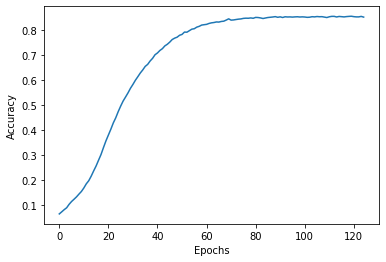

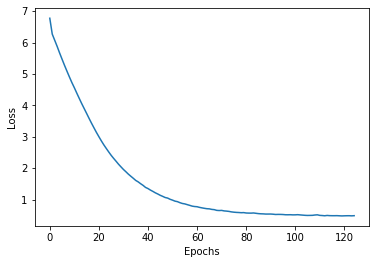

In [9]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
loss = history.history["loss"]

plt.plot(acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
